In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from tqdm import tqdm_notebook
from scipy.cluster.hierarchy import linkage, dendrogram
import time

num_clusters = 6
train_count = 10000
plotted_point_count = 500

In [33]:
def timing(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))
        return ret
    return wrap

In [34]:
dfStr = pd.read_csv('checks_str.txt', sep='\t')
dfTitles = pd.read_csv('checks_titles.txt', sep='\t')
names = pd.read_csv('id.txt', sep='\t', names=['idtov','name'])
data = pd.merge(dfStr, names, on='idtov')

data = pd.merge(dfTitles, data, on='iddoc' )
data.head()
# data['idtov'] = data['idtov'].astype(str)
# data.head(100)
# print(data.shape)
# for indx, tmp in data.iterrows():
#     if type(data['idtov'][indx]) != str:
#         print(type(data['idtov'][indx]))

,iddoc,docdate,return,store,kassa,seller,collector,idtov,count,price,summa,name name name name name name name name name name
0,227FR,2017-01-0308:14:07,0,N,1,H,2O,92N,4.0,68.0,272.0,Батарейка Duracell Turbo LR 6 2BL
1,227FU,2017-01-0308:14:08,0,N,1,3U,39,7P9,2.0,7.5,15.0,Подрозетник СЗМ3 д/бетон. стен
2,227FV,2017-01-0308:14:09,0,N,1,2O,39,38O,1.0,48.0,48.0,Батарейка Duracell LR03 бл/2 81268853
3,227FW,2017-01-0308:14:10,0,N,1,3U,39,9O0,1.0,11.0,11.0,Подрозетник 68*47 д/полых стен PE 030 040
4,227FX,2017-01-0308:14:11,0,N,1,2O,39,DJZ,8.0,182.0,1456.0,Лампа экон. Camelion LH 20W E14 4200К LH-FS-T2-M


In [4]:
# names = pd.read_csv('id.csv', sep='\t', names=['idtov','name'])
# # names['idtov'] = names['idtov'].astype(str)
# print(names.head())
# names.head()
# type(names['idtov'][0])

In [5]:
# data.join(names, on ='idtov')
# data.head()


In [6]:
#number_of_units_sold -  количество проданных единиц 
tovs = data.groupby(['idtov']).sum() #общее кол-во товаров по id товара
tovs['number_of_units_sold'] = data.groupby(['idtov']).size()
tovs = tovs.sort_values(by = ['summa'], ascending=False)
tovs.head()

,return,kassa,count,price,summa,number_of_units_sold
idtov,,,,,,
L0,23,11586,141387.3,117992.40,6328975.73,2624
KY,30,23114,190703.7,162373.65,5857220.68,5280
IKW,8,3857,64382.0,46835.13,3366551.29,833
2CZ,86,20434,4539.0,3334928.00,3333980.48,4444
O9W,3,952,196.0,3167875.00,3083935.80,200


In [7]:
ch = data.groupby(['iddoc']).sum()
ch['count_uniq_good'] = data.groupby(['iddoc']).size()

## K-means кластеризация

In [8]:
checks = ch.drop(columns=["return","kassa","price"])
checks = checks[checks['count_uniq_good'] > 2]
checks = checks[checks['summa'] > 0]
checks.head()

#нормализация данных
checks = pd.DataFrame(preprocessing.normalize(checks, axis=0), index = checks.index.values)
checks.columns=["kolvo","summa","count_uniq_good"]
checks.head()

trainDF = pd.DataFrame(checks[:train_count])
train = trainDF.values


In [9]:

#описываем модель
model = KMeans(n_clusters = num_clusters)

#проводим моделирование
time1 = time.time()
model.fit(train)
time2 = time.time()
print((time2-time1)*1000.0)

#предсказания
all_predictions = model.predict(train)

381.165027618


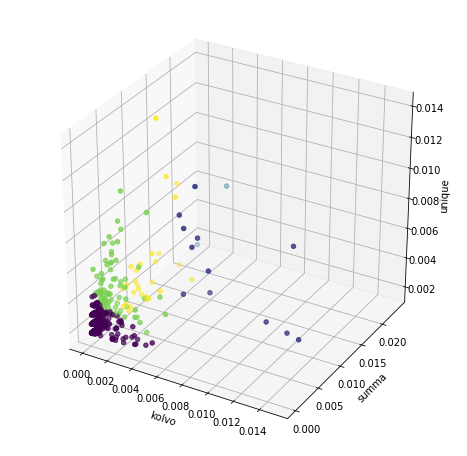

In [10]:
x_axis = train[:plotted_point_count, 0]
y_axis = train[:plotted_point_count, 1]
z_axis = train[:plotted_point_count, 2]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlabel="kolvo")
ax.set_ylabel(ylabel="summa")
ax.set_zlabel(zlabel="unique")
ax.scatter(x_axis, y_axis, z_axis, c=all_predictions[:plotted_point_count])

## Иерархическая кластеризация

4001.74093246


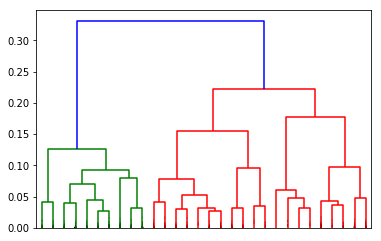

In [11]:
#сгенерировать матрицу связей

#проводим моделирование
time1 = time.time()
mergings = linkage(train, method='ward')
time2 = time.time()
print((time2-time1)*1000.0)


dendrogram(mergings,
           truncate_mode='lastp',
           show_leaf_counts=False,
           leaf_rotation=90,
           leaf_font_size=12,
          show_contracted=True,)
 
plt.show()

In [12]:
mergings

array([[6.67400000e+03, 8.80500000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.50000000e+01, 8.37000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.40000000e+01, 2.98900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.99870000e+04, 1.99930000e+04, 1.77966856e-01, 2.95000000e+02],
       [1.99950000e+04, 1.99960000e+04, 2.22157239e-01, 8.19000000e+02],
       [1.99940000e+04, 1.99970000e+04, 3.31527192e-01, 1.00000000e+04]])

## Метод кластеризации на основе плотности DBSCAN

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Определяем модель
dbscan = DBSCAN(eps=0.0005, min_samples=100)
 
# Обучаем
time1 = time.time()
dbscan.fit(trainDF)
time2 = time.time()
print((time2-time1)*1000.0)
all_predictions = dbscan.labels_

# a = sorted(dbscan.labels_)
# for i in range(0, len(a)):
#     print(a[i])

537.761211395


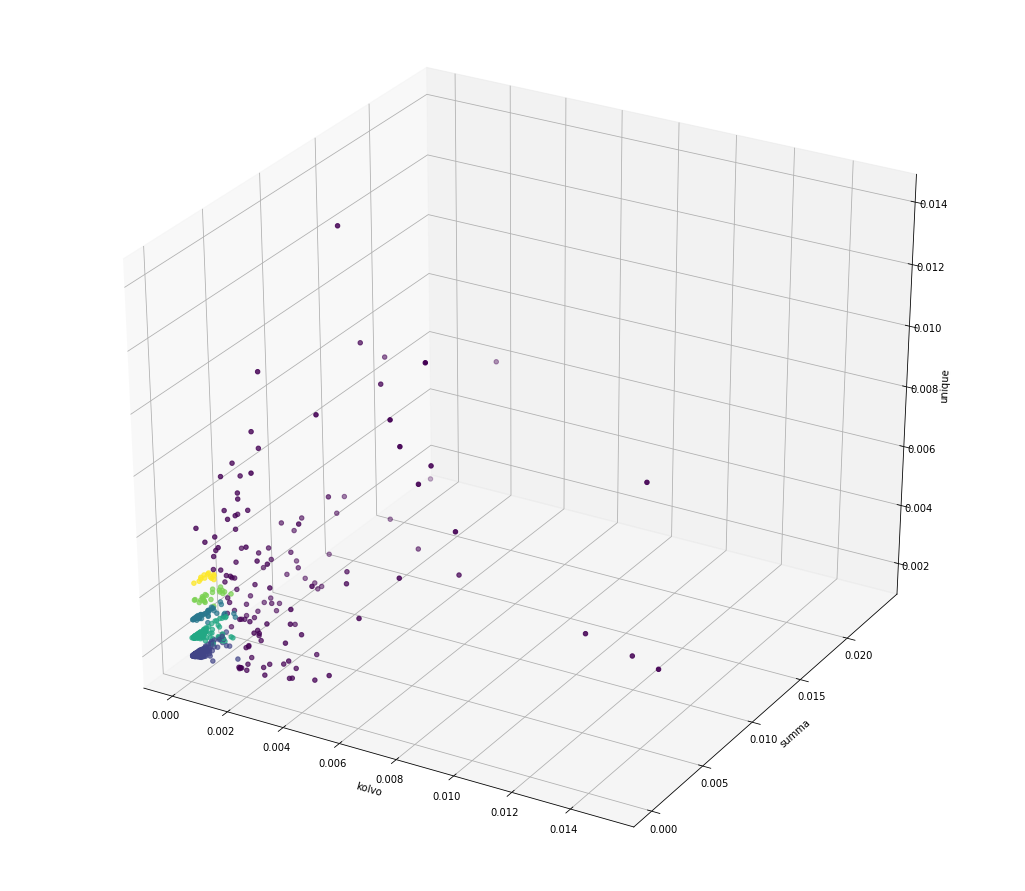

In [14]:
x_axis = train[:plotted_point_count, 0]
y_axis = train[:plotted_point_count, 1]
z_axis = train[:plotted_point_count, 2]
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(xlabel="kolvo")
ax.set_ylabel(ylabel="summa")
ax.set_zlabel(zlabel="unique")
ax.scatter(x_axis, y_axis, z_axis, c=all_predictions[:plotted_point_count])


In [35]:
dfrm = pd.Series({'predicted':all_predictions})
trainDF['predicted'] = dfrm['predicted']
trainDF.head(15)

testCheck = pd.DataFrame(checks[train_count+10:train_count+11])
pred = model.predict(testCheck.values)
print(pred)
print(testCheck.head())

test_check_content = pd.DataFrame(data[data['iddoc'].isin(testCheck.index.values)])

test_check_content.head()

[1]


,iddoc,idtov,count,price,name name name name name name name name name name
104085,240T5,IKW,70.0,52.9,"Кабель ВВГнг LSп 3* 2,5"
104086,240T5,9H,4.0,82.0,Автом.выкл. ИЭК ВА 47- 29 1р 16А
104087,240T5,9K,8.0,82.0,Автом.выкл. ИЭК ВА 47- 29 1р 25А
104088,240T5,R0,15.0,13.0,Коробка расп. узкая
104089,240T5,5ZT,20.0,35.0,"Кабель ВВГнг LSп 3* 1,5"


In [36]:
group = trainDF[trainDF['predicted']==1]
group.shape

(869, 4)

In [37]:
c = []
for i in range(num_clusters):
    group = trainDF[trainDF['predicted']==i]
    c.append(group.mean().values[:-1])
# print(c)

col = ['r','g','b','m', 'y', 'c']
a = []

print(testCheck.shape)
for index, t in testCheck.iterrows():
    closest = model.predict(np.array([t.values]))
    ax.scatter(t['kolvo'], t['summa'], t['count_uniq_good'], c=col[closest[0]])
    similar_checks = pd.DataFrame(trainDF[trainDF['predicted']==closest[0]])
    check_content = pd.DataFrame(data[data["iddoc"]==index])
    
    #получить все товары из похожих чеков
    train_tov = pd.DataFrame(data[data['iddoc'].isin(similar_checks.index.values)])

    
    for check_inedx, tovar in check_content.iterrows():
        #отбираем все те чеки в которых встречаются эти товары
        a.append(train_tov[train_tov['idtov'] == tovar['idtov']])
        
    a = pd.concat(a)
    a = pd.DataFrame(a.groupby(['iddoc']).size().reset_index(name='count'))
    a = a.sort_values(by=['count', 'iddoc'], ascending=False)
    
    b = []
    for ind, k in a.iterrows():
        t = pd.DataFrame(data[data["iddoc"]==a.iloc[ind]['iddoc']])
        b.extend(t.values)
        
    b = pd.DataFrame(b, columns = data.columns)
    summ = b.groupby(['idtov']).sum()
    summ['count_good'] = b.groupby(['idtov']).size()
    summ = summ.sort_values(by = ['count_good'], ascending=False)
#     print(b)

summ = pd.merge(summ, names, on='idtov')
summ.head()

(1, 3)


,idtov,return,kassa,count,price,summa,count_good,name name name name name name name name name name
0,9K,0,122,84.0,2540.0,6935.21,30,Автом.выкл. ИЭК ВА 47- 29 1р 25А
1,9H,0,74,75.0,1512.0,6140.40,18,Автом.выкл. ИЭК ВА 47- 29 1р 16А
2,24W,0,40,133.0,70.0,630.00,14,Шина соединит. 1ф до 63А (штырь)(54шт в 1м) ИЭК
3,2G5,0,30,6.0,1047.0,1000.06,6,Автом.выкл. ИЭК ВА 47- 29 2р 40А
4,DF6,0,22,6.0,54.0,53.10,6,Динрейка 10 см ИЭК


In [42]:
for index, tov in check_content.iterrows():
    summ = summ[summ.idtov != tov.idtov]
summ = summ.sort_values(by = ['count_good'], ascending=False)
# print(summ)
summ.head(15)

,idtov,price,count_good,name name name name name name name name name name
3,2G5,1047.0,6,Автом.выкл. ИЭК ВА 47- 29 2р 40А
4,DF6,54.0,6,Динрейка 10 см ИЭК
5,6O6,200.0,5,Изолента ПВХ REXANT цветная 19*25мм 09-2206
6,9F,439.0,5,Автом.выкл. ИЭК ВА 47- 29 1р 10А
8,2CZ,3012.0,4,Эл.счетчик Меркурий 201.5 (5-60А) 1-фазный
9,41L,220.0,4,Шина нулевая PEN 6*9 ( 8/2) ИЭК
10,KY,123.0,4,"Кабель ВВГп 2* 2,5"
11,RF,32.0,4,Подрозетник СЗМ2 д/бетон стен
16,AX,2257.0,3,УЗО ВД1-63 2Р 40А 30мА ИЭК
12,9U,996.0,3,Автом.выкл. ИЭК ВА 47- 29 3р 63А
